In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## Dataset Description

This dataset contains records of **electric vehicle (EV) energy consumption**, capturing operational, environmental, and vehicle-related factors that influence energy usage.

### File Contents

- **Identifiers**
  - Timestamp
  - Vehicle ID

- **Driving Parameters**
  - Speed
  - Acceleration
  - Driving mode (Eco, Normal, Sport)

- **Road & Traffic Conditions**
  - Road type (Urban, Rural, Highway)
  - Traffic level
  - Road slope (%)

- **Weather Factors**
  - Temperature
  - Humidity
  - Wind speed
  - Weather condition (Sunny, Rainy, Snowy, Foggy)

- **Vehicle Attributes**
  - Battery state
  - Battery voltage
  - Battery temperature
  - Tire pressure
  - Vehicle weight

- **Target Variable**
  - **Energy consumption (kWh)**

The dataset is suitable for analyzing and modeling how driving behavior, road conditions, weather, and vehicle characteristics impact EV energy consumption.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../data/raw/EV_Energy_Consumption_Dataset.csv')

In [6]:
df.columns

Index(['Vehicle_ID', 'Timestamp', 'Speed_kmh', 'Acceleration_ms2',
       'Battery_State_%', 'Battery_Voltage_V', 'Battery_Temperature_C',
       'Driving_Mode', 'Road_Type', 'Traffic_Condition', 'Slope_%',
       'Weather_Condition', 'Temperature_C', 'Humidity_%', 'Wind_Speed_ms',
       'Tire_Pressure_psi', 'Vehicle_Weight_kg', 'Distance_Travelled_km',
       'Energy_Consumption_kWh'],
      dtype='object')

In [7]:
df.head()

,Vehicle_ID,Timestamp,Speed_kmh,Acceleration_ms2,Battery_State_%,Battery_Voltage_V,Battery_Temperature_C,Driving_Mode,Road_Type,Traffic_Condition,Slope_%,Weather_Condition,Temperature_C,Humidity_%,Wind_Speed_ms,Tire_Pressure_psi,Vehicle_Weight_kg,Distance_Travelled_km,Energy_Consumption_kWh
0,1102,2024-01-01 00:00:00,111.507366,-2.773816,30.415148,378.091525,25.314786,2,1,1,6.879446,4,0.741770,42.172533,7.829253,31.112020,1822.967368,20.757508,12.054317
1,1435,2024-01-01 00:01:00,48.612323,-0.796982,97.385534,392.718377,18.240755,1,2,1,-3.007212,4,-3.495516,57.018427,4.495572,31.504366,2091.831914,0.642918,4.488701
2,1860,2024-01-01 00:02:00,108.733320,0.253800,84.912600,398.993495,44.449145,1,1,3,0.029585,1,9.248275,69.028911,5.144489,33.838015,1816.702497,40.842824,11.701377
3,1270,2024-01-01 00:03:00,38.579484,-2.111395,28.777904,358.128273,28.980155,1,2,2,8.271943,3,2.868409,86.638349,4.518283,33.256014,1283.102642,5.305229,7.389266
4,1106,2024-01-01 00:04:00,57.172438,1.477883,29.740160,310.888162,33.184551,2,1,1,2.776814,2,16.750244,27.189185,4.263406,33.579678,2160.350788,5.825926,6.761205


In [8]:
df.dtypes

Vehicle_ID                  int64
Timestamp                  object
Speed_kmh                 float64
Acceleration_ms2          float64
Battery_State_%           float64
Battery_Voltage_V         float64
Battery_Temperature_C     float64
Driving_Mode                int64
Road_Type                   int64
Traffic_Condition           int64
Slope_%                   float64
Weather_Condition           int64
Temperature_C             float64
Humidity_%                float64
Wind_Speed_ms             float64
Tire_Pressure_psi         float64
Vehicle_Weight_kg         float64
Distance_Travelled_km     float64
Energy_Consumption_kWh    float64
dtype: object

## Semantic Data Type Identification

Based on the **official dataset description**, the columns can be semantically classified as follows.

### Numerical (Continuous) Variables
These represent measurable quantities with meaningful magnitudes:

- Speed  
- Acceleration  
- Slope (%)  
- Temperature (°C)  
- Humidity (%)  
- Wind Speed (m/s)  
- Battery State (%)  
- Battery Voltage (V)  
- Battery Temperature (°C)  
- Tire Pressure (psi)  
- Vehicle Weight (kg)  
- Distance Travelled (km)  
- **Energy Consumption (kWh)** ← target variable

---

### Categorical (Nominal) Variables
These represent discrete categories without intrinsic ordering:

- Driving Mode (Eco, Normal, Sport)
- Road Type (Highway, Urban, Rural)
- Traffic Condition
- Weather Condition (Sunny, Rainy, Snowy, Foggy)

---

### Identifier / Temporal Variables
These are not considered features by default:

- Vehicle ID (identifier)
- Timestamp (temporal)

**Note:**  
Semantic classification is based on the dataset’s provided description, not inferred solely from data types.

In [9]:
df.isnull().sum()

Vehicle_ID                0
Timestamp                 0
Speed_kmh                 0
Acceleration_ms2          0
Battery_State_%           0
Battery_Voltage_V         0
Battery_Temperature_C     0
Driving_Mode              0
Road_Type                 0
Traffic_Condition         0
Slope_%                   0
Weather_Condition         0
Temperature_C             0
Humidity_%                0
Wind_Speed_ms             0
Tire_Pressure_psi         0
Vehicle_Weight_kg         0
Distance_Travelled_km     0
Energy_Consumption_kWh    0
dtype: int64

In [23]:
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns

outlier_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary[col] = {
        "num_outliers": outliers.shape[0],
        "percentage_outliers": (outliers.shape[0] / df.shape[0]) * 100
    }

outlier_df = pd.DataFrame.from_dict(
    outlier_summary,
    orient="index"
).reset_index()

outlier_df.columns = ["feature", "num_outliers", "percentage_outliers"]

outlier_df


,feature,num_outliers,percentage_outliers
0,Vehicle_ID,0,0.0
1,Speed_kmh,0,0.0
2,Acceleration_ms2,0,0.0
3,Battery_State_%,0,0.0
4,Battery_Voltage_V,0,0.0
5,Battery_Temperature_C,0,0.0
6,Driving_Mode,0,0.0
7,Road_Type,0,0.0
8,Traffic_Condition,0,0.0
9,Slope_%,0,0.0


## Data Visualization

### Energy Consumption vs Distance Travelled
A scatter plot was used to examine the relationship between route length and energy consumption.  
This visualization helps assess whether energy usage scales proportionally with distance, which is critical for route feasibility analysis.

---

### Energy Consumption under Different Weather Conditions
A box plot was used to compare energy consumption across different weather conditions.  
This visualization highlights the variability in energy demand due to environmental factors such as rain, snow, or fog.

---

### Distribution of Energy Consumption
A histogram of energy consumption values was plotted to analyze the overall distribution.  
This visualization helps identify typical consumption ranges, skewness, and the presence of extreme values or outliers.

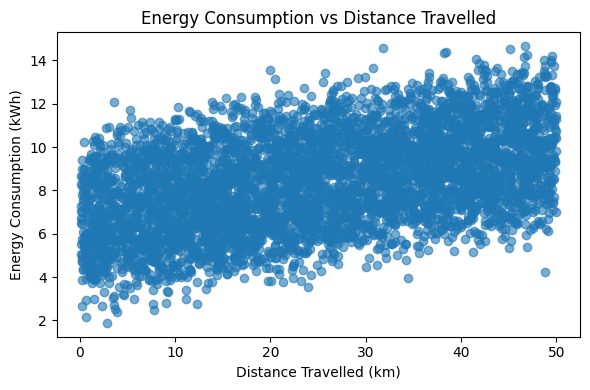

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df["Distance_Travelled_km"], df["Energy_Consumption_kWh"], alpha=0.6)
plt.xlabel("Distance Travelled (km)")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption vs Distance Travelled")
plt.tight_layout()
plt.show()

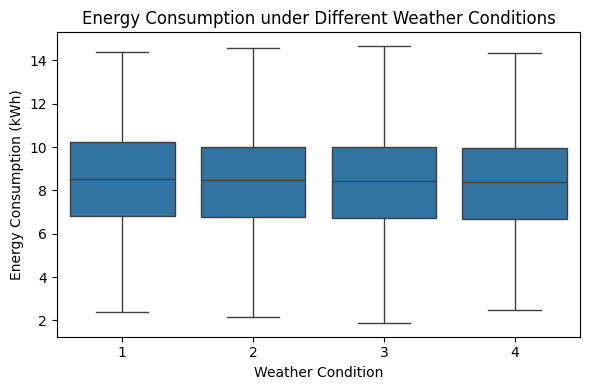

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(
    x="Weather_Condition",
    y="Energy_Consumption_kWh",
    data=df
)
plt.xlabel("Weather Condition")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption under Different Weather Conditions")
plt.tight_layout()
plt.show()

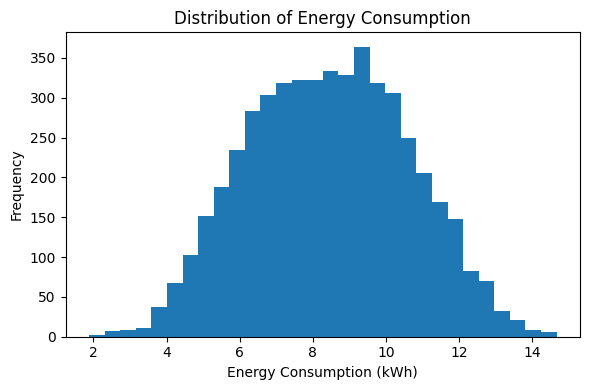

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["Energy_Consumption_kWh"], bins=30)
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.title("Distribution of Energy Consumption")
plt.tight_layout()
plt.show()


In [13]:
df.describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max', 'mean', 'std']]

,Vehicle_ID,Speed_kmh,Acceleration_ms2,Battery_State_%,Battery_Voltage_V,Battery_Temperature_C,Driving_Mode,Road_Type,Traffic_Condition,Slope_%,Weather_Condition,Temperature_C,Humidity_%,Wind_Speed_ms,Tire_Pressure_psi,Vehicle_Weight_kg,Distance_Travelled_km,Energy_Consumption_kWh
min,1000.000000,0.001396,-2.999683,20.020196,300.004812,10.003858,1.000000,1.000000,1.000000,-4.991079,1.00000,-4.995288,20.027119,0.000126,28.001891,1200.960317,0.107544,1.881426
25%,1253.000000,29.515400,-1.490240,40.088318,326.613439,18.884742,1.000000,1.000000,1.000000,-1.235653,1.00000,5.950476,37.970900,3.837738,29.772709,1531.417633,12.736568,6.771081
50%,1510.000000,58.646794,-0.043329,60.490283,351.510915,27.581710,2.000000,2.000000,2.000000,2.452368,2.00000,17.330798,55.650512,7.495373,31.484048,1865.006523,24.640458,8.455746
75%,1761.000000,89.030001,1.473887,80.409928,375.968140,35.920162,3.000000,3.000000,3.000000,6.366990,3.00000,28.624021,72.650838,11.291284,33.256528,2181.071491,37.562482,10.031938
max,1999.000000,119.946924,2.998039,99.993986,399.990098,44.985943,3.000000,3.000000,3.000000,9.998358,4.00000,39.998063,89.988891,14.999095,34.997829,2499.504564,49.993767,14.660528
mean,1505.701200,59.312952,-0.019885,60.214465,351.118306,27.510130,2.011000,1.999200,2.010800,2.504690,2.48340,17.312654,55.302173,7.505087,31.503390,1854.719760,24.994042,8.437983
std,290.836902,34.517605,1.724287,23.128262,28.968372,10.015385,0.810068,0.808536,0.812167,4.360854,1.11372,13.005106,20.161289,4.325455,2.017357,373.685150,14.246454,2.184809


In [15]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
outlier_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        'num_outliers': outliers.shape[0],
        'percentage_outliers': (outliers.shape[0] / df.shape[0]) * 100
    }

In [16]:
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index').reset_index()
outlier_df.columns = ['Feature', 'Number of Outliers', 'Percentage of Outliers']
outlier_df

,Feature,Number of Outliers,Percentage of Outliers
0,Vehicle_ID,0,0.0
1,Speed_kmh,0,0.0
2,Acceleration_ms2,0,0.0
3,Battery_State_%,0,0.0
4,Battery_Voltage_V,0,0.0
5,Battery_Temperature_C,0,0.0
6,Driving_Mode,0,0.0
7,Road_Type,0,0.0
8,Traffic_Condition,0,0.0
9,Slope_%,0,0.0


## Correlation Analysis

### Correlation Heatmap (Continuous Features)
A correlation heatmap was constructed using a selected set of continuous variables that showed meaningful relationships with energy consumption.  
This visualization helps identify linear dependencies between variables and supports feature selection for modeling.

Only continuous variables were included to ensure interpretability and to avoid misleading correlations caused by encoded categorical values or identifiers.

---

### Target-Focused Correlation Analysis
To better understand which variables are most strongly related to energy consumption, the correlation between each numerical feature and the target variable (**Energy_Consumption_kWh**) was computed.

The results indicate:
- **Speed_kmh** shows a strong positive correlation, suggesting higher speeds are associated with higher energy consumption.
- **Distance_Travelled_km** has a moderate positive correlation, consistent with longer routes requiring more energy.
- **Battery_State_%** shows a moderate negative correlation, indicating that lower battery states are observed alongside higher recorded energy usage.
- Environmental variables (humidity, slope, battery temperature) show weaker but non-negligible relationships.

Variables with correlations close to zero exhibit little to no linear relationship with energy consumption.

---

## How These Correlation Values Are Calculated

The reported values are **Pearson correlation coefficients**, which measure the strength and direction of a linear relationship between two numerical variables.

For two variables \(X\) and \(Y\), the Pearson correlation coefficient is defined as:

$$
r = \frac{\mathrm{cov}(X, Y)}{\sigma_X \, \sigma_Y}
$$

Where:

- $\mathrm{cov}(X, Y)$ is the covariance between $X$ and $Y$
- $\sigma_X$ is the standard deviation of $X$
- $\sigma_Y$ is the standard deviation of $Y$


The correlation coefficient \(r\) takes values in the range:

- \(r = +1\): perfect positive linear relationship  
- \(r = 0\): no linear relationship  
- \(r = -1\): perfect negative linear relationship  

In this analysis, a **larger absolute value of \(r\)** indicates a **stronger linear association** with energy consumption.

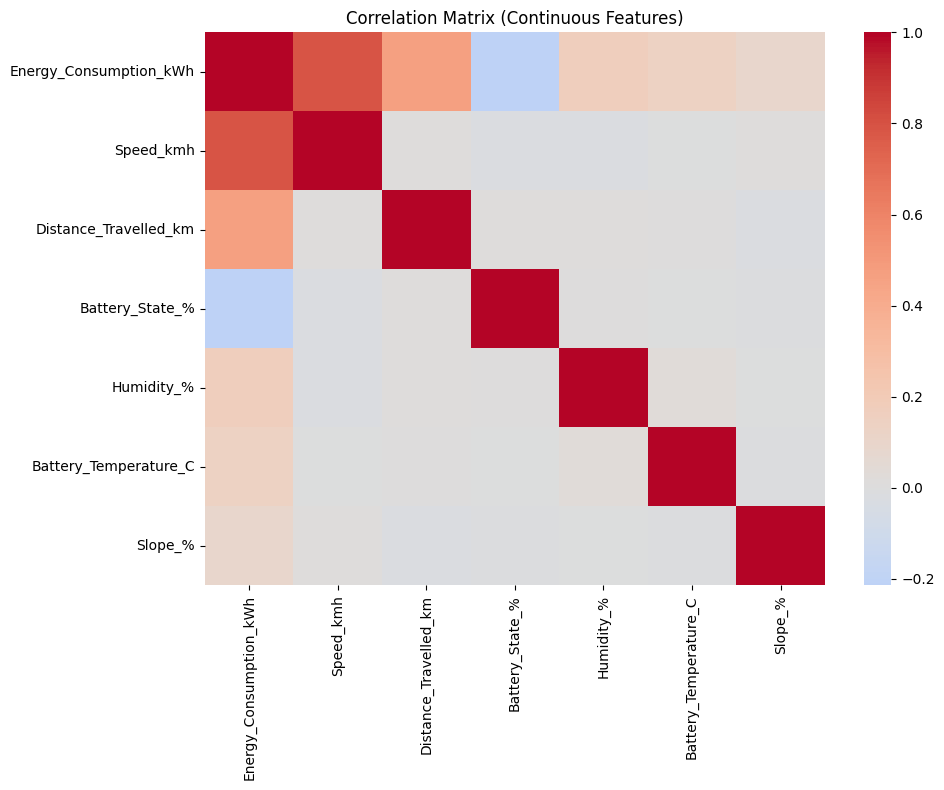

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

continuous_cols = [
    "Energy_Consumption_kWh",
    "Speed_kmh",
    "Distance_Travelled_km",
    "Battery_State_%",
    "Humidity_%",
    "Battery_Temperature_C",
    "Slope_%"
]

corr = df[continuous_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Continuous Features)")
plt.tight_layout()
plt.show()

In [21]:
target_corr = (
    df.select_dtypes(include="number")
      .corr()["Energy_Consumption_kWh"]
      .sort_values(ascending=False)
)

target_corr

Energy_Consumption_kWh    1.000000
Speed_kmh                 0.792811
Distance_Travelled_km     0.465870
Humidity_%                0.172985
Battery_Temperature_C     0.141392
Slope_%                   0.086668
Wind_Speed_ms             0.073352
Driving_Mode              0.033469
Road_Type                 0.018555
Battery_Voltage_V         0.010096
Traffic_Condition         0.002514
Vehicle_ID                0.001098
Vehicle_Weight_kg        -0.002189
Acceleration_ms2         -0.006524
Weather_Condition        -0.019388
Temperature_C            -0.033740
Tire_Pressure_psi        -0.036304
Battery_State_%          -0.213832
Name: Energy_Consumption_kWh, dtype: float64